In [ ]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install requests
%pip install chardet

Импорт необходимых библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import chardet
from rdkit import Chem
from rdkit.Chem import Draw
import os
import chardet

In [ ]:
%pip install ipykernel


Код для загрузки данных, использующий универсальную декодировку chardet

In [3]:
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

def load_data(drug_name):
    base_path = f'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/{drug_name.replace(" ", "_")}/'

    # Загрузка molecule_properties.json
    try:
        with open(base_path + 'molecule_properties.json', 'r', encoding='utf-8') as file:
            molecule_properties = json.load(file)
    except Exception as e:
        print(f"Ошибка при загрузке molecule_properties.json: {e}")
        molecule_properties = None

    # Загрузка info.txt
    try:
        encoding = detect_encoding(base_path + 'info.txt')
        with open(base_path + 'info.txt', 'r', encoding=encoding) as file:
            info = file.read()
    except Exception as e:
        print(f"Ошибка при загрузке info.txt: {e}")
        info = None

    # Загрузка mechanism.txt
    try:
        encoding = detect_encoding(base_path + 'mechanism.txt')
        with open(base_path + 'mechanism.txt', 'r', encoding=encoding) as file:
            mechanism = file.read()
    except Exception as e:
        print(f"Ошибка при загрузке mechanism.txt: {e}")
        mechanism = None

    # Загрузка изображения
    image_path = base_path + 'image.png'
    if not os.path.exists(image_path):
        image_path = None

    return molecule_properties, info, mechanism, image_path


In [4]:
atenolol_properties, atenolol_info, atenolol_mechanism, atenolol_image_path = load_data('Atenolol')

Преобразование содержимого файла mechanism.txt в формат JSON: 
1 - чтение файла
2 - парсинг данных: разделение строки на ключи и значения.
3 - создание JSON-структуры: формирование словаря и запись его в JSON-файл.
Функция parse_mechanism_file:
Открывает файл и считывает его построчно.
Разделяет каждую строку на ключ и значение.
Убирает пробелы и добавляет данные в словарь.
Запись в JSON файл:
Создает новый JSON-файл и записывает в него преобразованные данные.
(код преобразует данные из файла mechanism.txt в формат JSON и сохраняет их в новый файл mechanism.json)

In [5]:
def parse_mechanism_file(file_path):
    # Словарь для хранения данных
    mechanism_data = {}
    
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        
        for line in lines:
            # Разделение строки на ключ и значение
            if ':' in line:
                key, value = line.split(':', 1)
                key = key.strip()
                value = value.strip()
                
                # Специальное разбиение для URL, если есть
                if key == 'ref_url':
                    value = value.split(';')[0].strip()
                
                mechanism_data[key] = value
    
    return mechanism_data

# Путь к файлу
file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/mechanism.txt'

# Преобразование файла в JSON
mechanism_data = parse_mechanism_file(file_path)

# Запись в JSON файл
json_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/mechanism.json'
with open(json_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(mechanism_data, json_file, ensure_ascii=False, indent=4)

print(f"JSON файл успешно создан по пути: {json_file_path}")


JSON файл успешно создан по пути: C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/mechanism.json


## Компиляция визуализации

### Описание кода визуализации данных молекулы
В данном разделе представлен код, предназначенный для визуализации данных о молекуле с использованием информации из нескольких файлов. Код создает комплексный график, включающий изображение молекулы, текстовое описание механизма действия и график свойств молекулы.
Основные шаги кода:
Загрузка данных:
    Файл JSON (molecule_properties.json) содержит свойства молекулы в формате ключ-значение.
    Файл TXT (info.txt) содержит метаданные о молекуле, такие как латинское название, брутто формула и InChIKey.
    Файл TXT (mechanism.txt) включает текстовое описание механизма действия молекулы.
    Файл изображения (molecule.png) представляет собой визуализацию молекулы.
Чтение данных:
    Данные загружаются из файлов и обрабатываются для извлечения необходимых значений.
    В случае с JSON-файлом ключи и значения свойств молекулы извлекаются и фильтруются, чтобы удалить значения None.
Преобразование данных:
    Значения свойств молекулы преобразуются в числовой формат для возможности отображения на графике.
    Отфильтрованные данные, которые не могут быть преобразованы в числа, игнорируются.
Создание графиков:
    Первый график отображает изображение молекулы. Это изображение загружается и отображается в верхней левой части графика.
    Второй график содержит текстовое описание механизма действия молекулы. Описание размещается в верхней правой части графика с использованием мелкого шрифта.
    Третий график представляет собой горизонтальный бар-график, отображающий числовые значения свойств молекулы. Этот график расположен в нижней левой части и визуализирует ключевые свойства молекулы, такие как LogP, PSA и количество ароматических колец.
Заголовок графика:
    Заголовок включает латинское название молекулы, её InChIKey и брутто формулу. Заголовок размещается в верхней части графика и обеспечивает дополнительный контекст для визуализируемых данных.
Корректировка макета:
    Используется метод tight_layout() для оптимизации размещения всех элементов графика, чтобы избежать наложения текста и графиков.
Данный подход позволяет создать наглядное представление о молекуле, объединяя визуальные и текстовые данные в одном графике, больше похожим на карточку по препарату с описанием основных фармаколонических и биохимических параметров. При появлении возможности сохранять из открытых источников более интересные и сложные визуализации, процессы этот код будет видизменяться ( и утяжеляться), для чего предусмотрено в дальнейшем использование модуля shutil, а пока это недоступно, есть возможность сравнивать интересующие препараты.

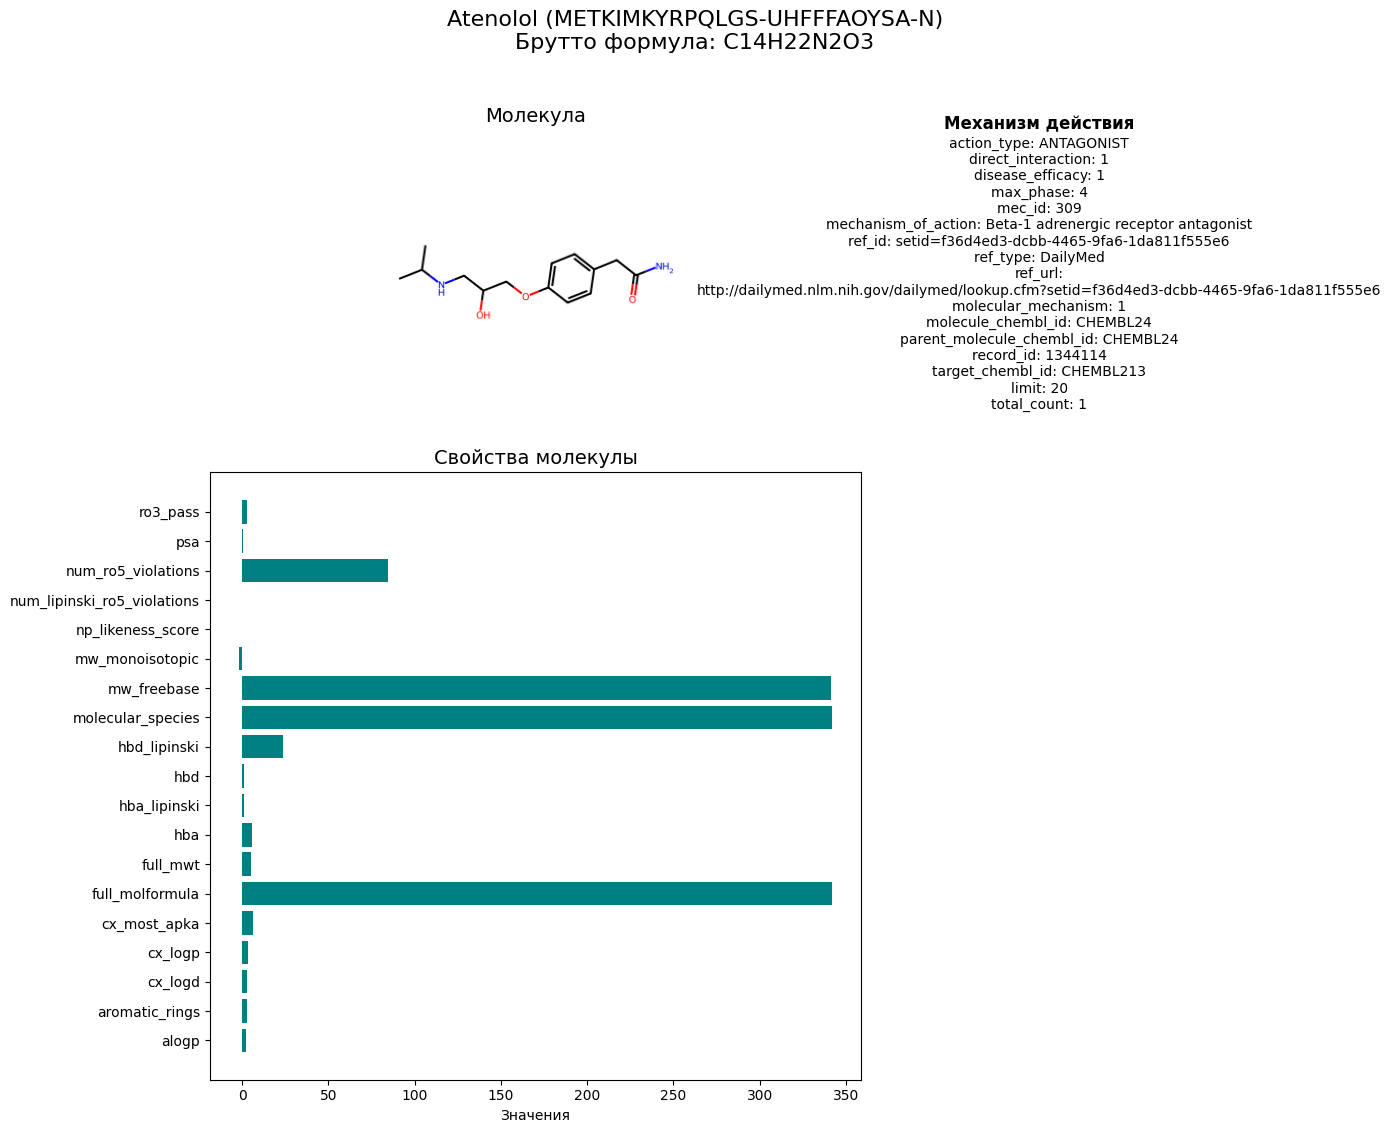

In [6]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Загрузка данных
json_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/molecule_properties.json'
image_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/molecule.png'
info_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/info.txt'
mechanism_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/mechanism.txt'

# Загрузка и обработка информации о молекуле
with open(json_file_path, 'r', encoding='utf-8') as file:
    properties = json.load(file).get('molecule_properties', {})

with open(info_file_path, 'r', encoding='utf-8') as file:
    info_lines = file.read().split('\n')

latin_name = next((line for line in info_lines if line.startswith('Латинское название:')), '').split(': ')[1]
molecular_formula = next((line for line in info_lines if line.startswith('Брутто формула:')), '').split(': ')[1]
inchi_key = next((line for line in info_lines if line.startswith('Химическое название (InChIKey):')), '').split(': ')[1]

# Загрузка текста механизма действия
with open(mechanism_file_path, 'r', encoding='utf-8') as file:
    mechanism_data = file.read()

# Преобразование свойств молекулы в списки
properties_keys = list(properties.keys())
properties_values = [value for value in properties.values() if value is not None]

# Преобразование значений в числовой формат, если это возможно
numeric_values = []
valid_keys = []
for i, value in enumerate(properties_values):
    try:
        numeric_values.append(float(value))
        valid_keys.append(properties_keys[i])
    except (ValueError, TypeError):
        continue

# Создание комбинированного графика
fig, ax = plt.subplots(2, 2, figsize=(14, 12), gridspec_kw={'width_ratios': [2, 1], 'height_ratios': [1, 2]})

# Молекула
img = mpimg.imread(image_file_path)
ax[0, 0].imshow(img)
ax[0, 0].axis('off')
ax[0, 0].set_title('Молекула', fontsize=14)

# Аннотация механизма действия
ax[0, 1].text(0.5, 1.05, 'Механизм действия', fontsize=12, ha='center', va='top', fontweight='bold')
ax[0, 1].text(0.5, 0.5, mechanism_data, fontsize=10, ha='center', va='center', wrap=True)
ax[0, 1].axis('off')

# Визуализация свойств молекулы
if valid_keys and numeric_values:  # Проверка, чтобы убедиться, что есть валидные данные
    ax[1, 0].barh(valid_keys, numeric_values, color='teal')
    ax[1, 0].set_xlabel('Значения')
    ax[1, 0].set_title('Свойства молекулы', fontsize=14)
else:
    ax[1, 0].text(0.5, 0.5, 'Нет данных для отображения', fontsize=12, ha='center', va='center')

# Дополнительное пространство в нижнем правом углу
ax[1, 1].axis('off')

# Заголовок
fig.suptitle(f'{latin_name} ({inchi_key})\nБрутто формула: {molecular_formula}', fontsize=16, y=0.97)

# Отображение всех графиков
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Модуль 1 
Обобщим код для более краткого вызова, создав необходимые функции
## Функция для конвертации mechanism.txt в JSON
Добавим функцию convert_mechanism_to_json, которая преобразует текстовый файл в JSON:

In [7]:
import json

def convert_mechanism_to_json(mechanism_txt_path, json_path):
    """
    Преобразует содержимое файла mechanism.txt в формат JSON.

    :param mechanism_txt_path: Путь к исходному файлу mechanism.txt
    :param json_path: Путь к выходному файлу JSON
    """
    with open(mechanism_txt_path, 'r') as file:
        lines = file.readlines()

    mechanism_data = {}
    for line in lines:
        if ':' in line:
            key, value = line.split(':', 1)
            mechanism_data[key.strip()] = value.strip()

    with open(json_path, 'w') as json_file:
        json.dump(mechanism_data, json_file, indent=4)

In [8]:

# Пример использования
mechanism_txt_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/mechanism.txt'
json_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/mechanism.json'
convert_mechanism_to_json(mechanism_txt_path, json_path)


In [9]:
# Загрузка данных для Minoxidil
minoxidil_properties, minoxidil_info, minoxidil_mechanism, minoxidil_image_path = load_data('Minoxidil')

# Модуль 2
Обобщим код для более краткого вызова, создав необходимые функции
## Определение функции для визуализации
Эта функция принимает пути к файлам и создает визуализацию, но нужно убедиться, что все значения, которые мы пытаемся преобразовать в float, действительно являются строками, и пропускать те, которые являются None или другими типами данных:

In [10]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def visualize_data(properties_json_path, image_path, info_file_path, mechanism_file_path):
    """
    Создает визуализацию данных молекулы и её свойств.
    :param properties_json_path: Путь к JSON-файлу с свойствами молекулы
    :param image_path: Путь к изображению молекулы
    :param info_file_path: Путь к текстовому файлу с дополнительной информацией о молекуле
    :param mechanism_file_path: Путь к текстовому файлу с механизмом действия
    """
    # Загрузка и обработка информации о молекуле
    with open(properties_json_path, 'r', encoding='utf-8') as file:
        properties = json.load(file).get('molecule_properties', {})

    with open(info_file_path, 'r', encoding='utf-8') as file:
        info_lines = file.read().split('\n')

    latin_name = next((line for line in info_lines if line.startswith('Латинское название:')), '').split(': ')[1]
    molecular_formula = next((line for line in info_lines if line.startswith('Брутто формула:')), '').split(': ')[1]
    inchi_key = next((line for line in info_lines if line.startswith('Химическое название (InChIKey):')), '').split(': ')[1]

    # Загрузка текста механизма действия
    with open(mechanism_file_path, 'r', encoding='utf-8') as file:
        mechanism_data = file.read()

    # Преобразование свойств молекулы в списки
    properties_keys = list(properties.keys())
    properties_values = [value for value in properties.values() if value is not None]

    # Преобразование значений в числовой формат, если это возможно
    numeric_values = []
    valid_keys = []
    for i, value in enumerate(properties_values):
        try:
            numeric_values.append(float(value))
            valid_keys.append(properties_keys[i])
        except (ValueError, TypeError):
            continue

    # Создание комбинированного графика
    fig, ax = plt.subplots(2, 2, figsize=(14, 12), gridspec_kw={'width_ratios': [2, 1], 'height_ratios': [1, 2]})

    # Молекула
    img = mpimg.imread(image_path)
    ax[0, 0].imshow(img)
    ax[0, 0].axis('off')
    ax[0, 0].set_title('Молекула', fontsize=14)

    # Аннотация механизма действия
    ax[0, 1].text(0.5, 1.1, 'Механизм действия', fontsize=12, ha='center', va='top', fontweight='bold')
    ax[0, 1].text(0.5, 0.5, mechanism_data, fontsize=10, ha='center', va='center', wrap=True)
    ax[0, 1].axis('off')

    # Визуализация свойств молекулы
    if valid_keys and numeric_values:  # Проверка, чтобы убедиться, что есть валидные данные
        bars = ax[1, 0].barh(valid_keys, numeric_values, color='teal')
        ax[1, 0].set_xlabel('Значения')
        ax[1, 0].set_title('Свойства молекулы', fontsize=14)

        # Подпись значений столбцов
        for bar in bars:
            width = bar.get_width()
            ax[1, 0].text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', fontsize=10)
    else:
        ax[1, 0].text(0.5, 0.5, 'Нет данных для отображения', fontsize=12, ha='center', va='center')

    # Дополнительное пространство в нижнем правом углу
    ax[1, 1].axis('off')

    # Заголовок
    fig.suptitle(f'{latin_name} ({inchi_key})\nБрутто формула: {molecular_formula}', fontsize=16, y=0.95)

    # Отображение всех графиков
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

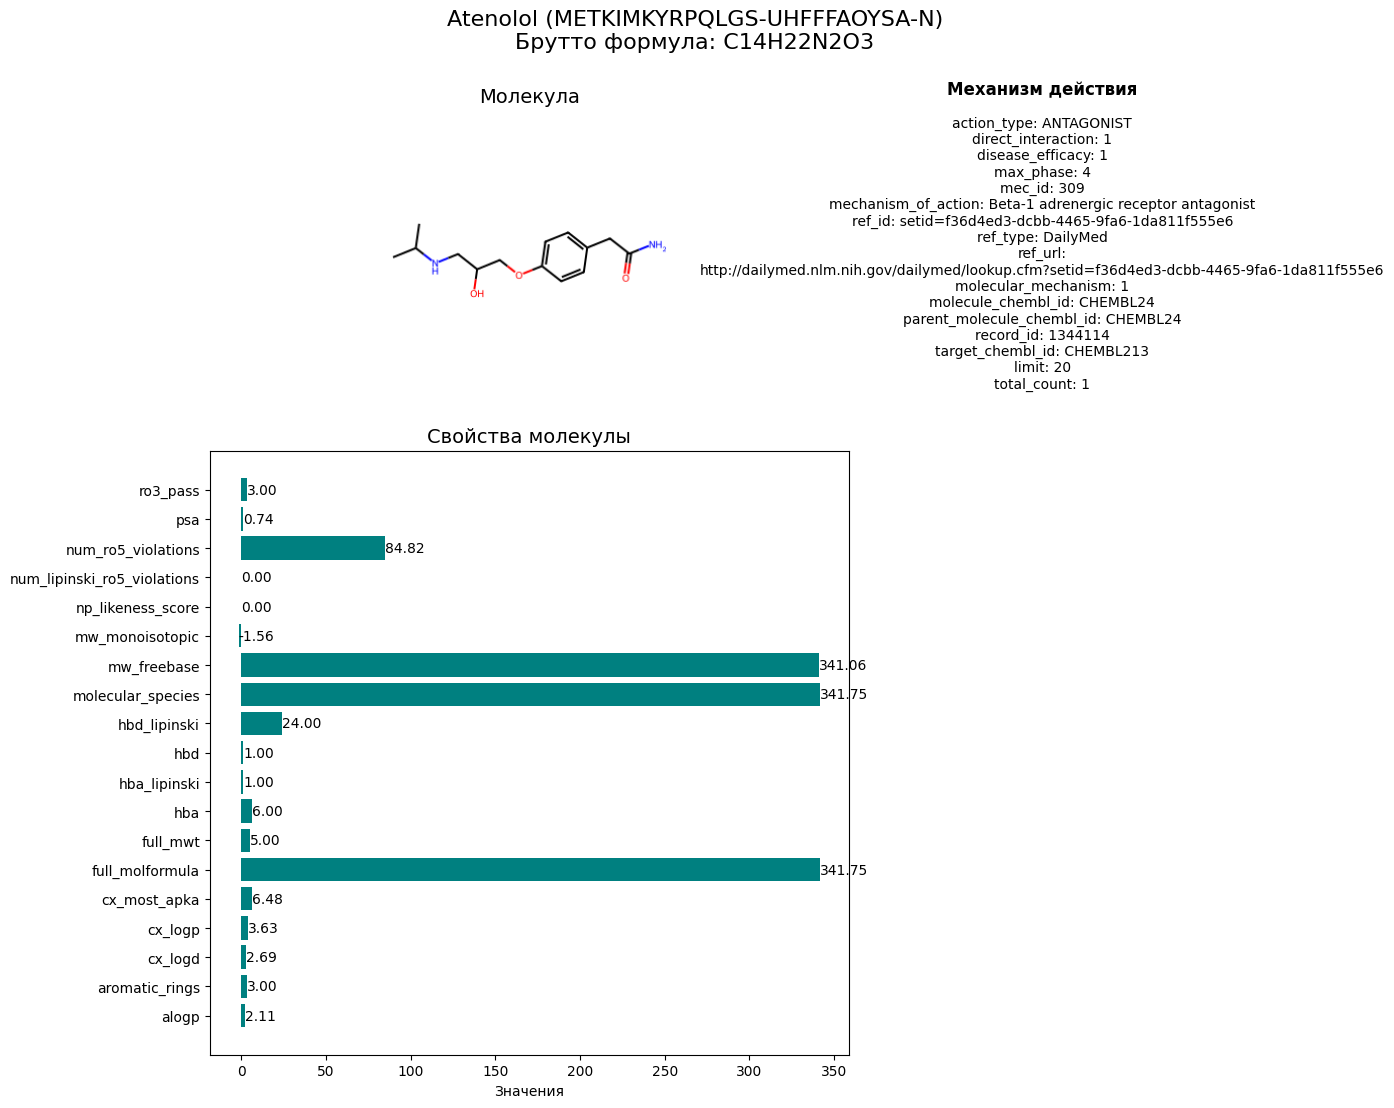

In [11]:
# Пример вызова функции
# Этот код используется для вызова функции с конкретными путями к файлам и изображению
properties_json_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/molecule_properties.json'
image_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/molecule.png'
info_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/info.txt'
mechanism_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/mechanism.txt'

visualize_data(properties_json_path, image_path, info_file_path, mechanism_file_path)


## Функция для объединения и визуализации данных двух препаратов
Этот код создаст два графика, которые будут содержать изображения и механизмы действия для двух препаратов, а также объединенный график для сравнения их свойств.
Описание функций:

    -load_properties_and_info(properties_json_path, info_file_path, mechanism_json_path): Загружает данные из JSON-файлов и текстовых файлов, преобразует свойства молекулы в числовые значения и возвращает их в виде словаря.

    -visualize_two_drugs(properties_json_path1, properties_json_path2, image_path1, image_path2, info_file_path1, info_file_path2, mechanism_json_path1, mechanism_json_path2): Создает комбинированную визуализацию для двух препаратов, включая изображения молекул, текст механизмов действия и график свойств молекул.

In [12]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def visualize_two_drugs(properties_json_path1, properties_json_path2, image_path1, image_path2, info_file_path1, info_file_path2, mechanism_json_path1, mechanism_json_path2):
    """
    Создает визуализацию данных двух молекул и их свойств.
    :param properties_json_path1: Путь к JSON-файлу с свойствами первой молекулы
    :param properties_json_path2: Путь к JSON-файлу с свойствами второй молекулы
    :param image_path1: Путь к изображению первой молекулы
    :param image_path2: Путь к изображению второй молекулы
    :param info_file_path1: Путь к текстовому файлу с дополнительной информацией о первой молекуле
    :param info_file_path2: Путь к текстовому файлу с дополнительной информацией о второй молекуле
    :param mechanism_json_path1: Путь к JSON-файлу с механизмом действия первой молекулы
    :param mechanism_json_path2: Путь к JSON-файлу с механизмом действия второй молекулы
    """
    
    def load_properties_and_info(properties_json_path, info_file_path, mechanism_json_path):
        # Загрузка и обработка информации о молекуле
        with open(properties_json_path, 'r', encoding='utf-8') as file:
            properties = json.load(file).get('molecule_properties', {})

        with open(info_file_path, 'r', encoding='utf-8') as file:
            info_lines = file.read().split('\n')

        latin_name = next((line for line in info_lines if line.startswith('Латинское название:')), '').split(': ')[1]
        molecular_formula = next((line for line in info_lines if line.startswith('Брутто формула:')), '').split(': ')[1]
        inchi_key = next((line for line in info_lines if line.startswith('Химическое название (InChIKey):')), '').split(': ')[1]

        # Загрузка текста механизма действия
        with open(mechanism_json_path, 'r', encoding='utf-8') as file:
            mechanism_data = file.read()

        # Преобразование свойств молекулы в списки
        properties_keys = list(properties.keys())
        properties_values = [value for value in properties.values() if value is not None]

        # Преобразование значений в числовой формат, если это возможно
        numeric_values = []
        valid_keys = []
        for i, value in enumerate(properties_values):
            try:
                numeric_values.append(float(value))
                valid_keys.append(properties_keys[i])
            except (ValueError, TypeError):
                continue

        return {
            'latin_name': latin_name,
            'molecular_formula': molecular_formula,
            'inchi_key': inchi_key,
            'mechanism_data': mechanism_data,
            'properties_keys': valid_keys,
            'numeric_values': numeric_values
        }
    
    # Загрузка данных для обоих препаратов
    data1 = load_properties_and_info(properties_json_path1, info_file_path1, mechanism_json_path1)
    data2 = load_properties_and_info(properties_json_path2, info_file_path2, mechanism_json_path2)

    # Создание комбинированного графика
    fig, ax = plt.subplots(2, 2, figsize=(16, 14), gridspec_kw={'width_ratios': [2, 2], 'height_ratios': [1, 2]})

    # Изображения молекул
    img1 = mpimg.imread(image_path1)
    img2 = mpimg.imread(image_path2)
    ax[0, 0].imshow(img1)
    ax[0, 0].axis('off')
    ax[0, 0].set_title(f'Молекула 1: {data1["latin_name"]}', fontsize=14)

    ax[0, 1].imshow(img2)
    ax[0, 1].axis('off')
    ax[0, 1].set_title(f'Молекула 2: {data2["latin_name"]}', fontsize=14)

    # Аннотации механизма действия
    ax[1, 0].text(0.5, 1.1, 'Механизм действия 1', fontsize=12, ha='center', va='top', fontweight='bold')
    ax[1, 0].text(0.5, 0.5, data1['mechanism_data'], fontsize=10, ha='center', va='center', wrap=True)
    ax[1, 0].axis('off')

    ax[1, 1].text(0.5, 1.1, 'Механизм действия 2', fontsize=12, ha='center', va='top', fontweight='bold')
    ax[1, 1].text(0.5, 0.5, data2['mechanism_data'], fontsize=10, ha='center', va='center', wrap=True)
    ax[1, 1].axis('off')

    # Визуализация свойств молекул
    fig, ax = plt.subplots(figsize=(16, 8))
    indices = np.arange(len(data1['properties_keys']))
    width = 0.35  # Ширина столбцов

    bars1 = ax.barh(indices - width/2, data1['numeric_values'], width, label=data1['latin_name'], color='teal', alpha=0.7)
    bars2 = ax.barh(indices + width/2, data2['numeric_values'], width, label=data2['latin_name'], color='coral', alpha=0.7)

    # Подпись значений
    for bars in [bars1, bars2]:
        for bar in bars:
            width = bar.get_width()
            ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

    ax.set_yticks(indices)
    ax.set_yticklabels(data1['properties_keys'])
    ax.set_xlabel('Значения')
    ax.set_title('Свойства молекул')
    ax.legend()

    # Заголовок
    fig.suptitle(f'Сравнение двух молекул', fontsize=16, y=0.95)

    # Отображение всех графиков
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

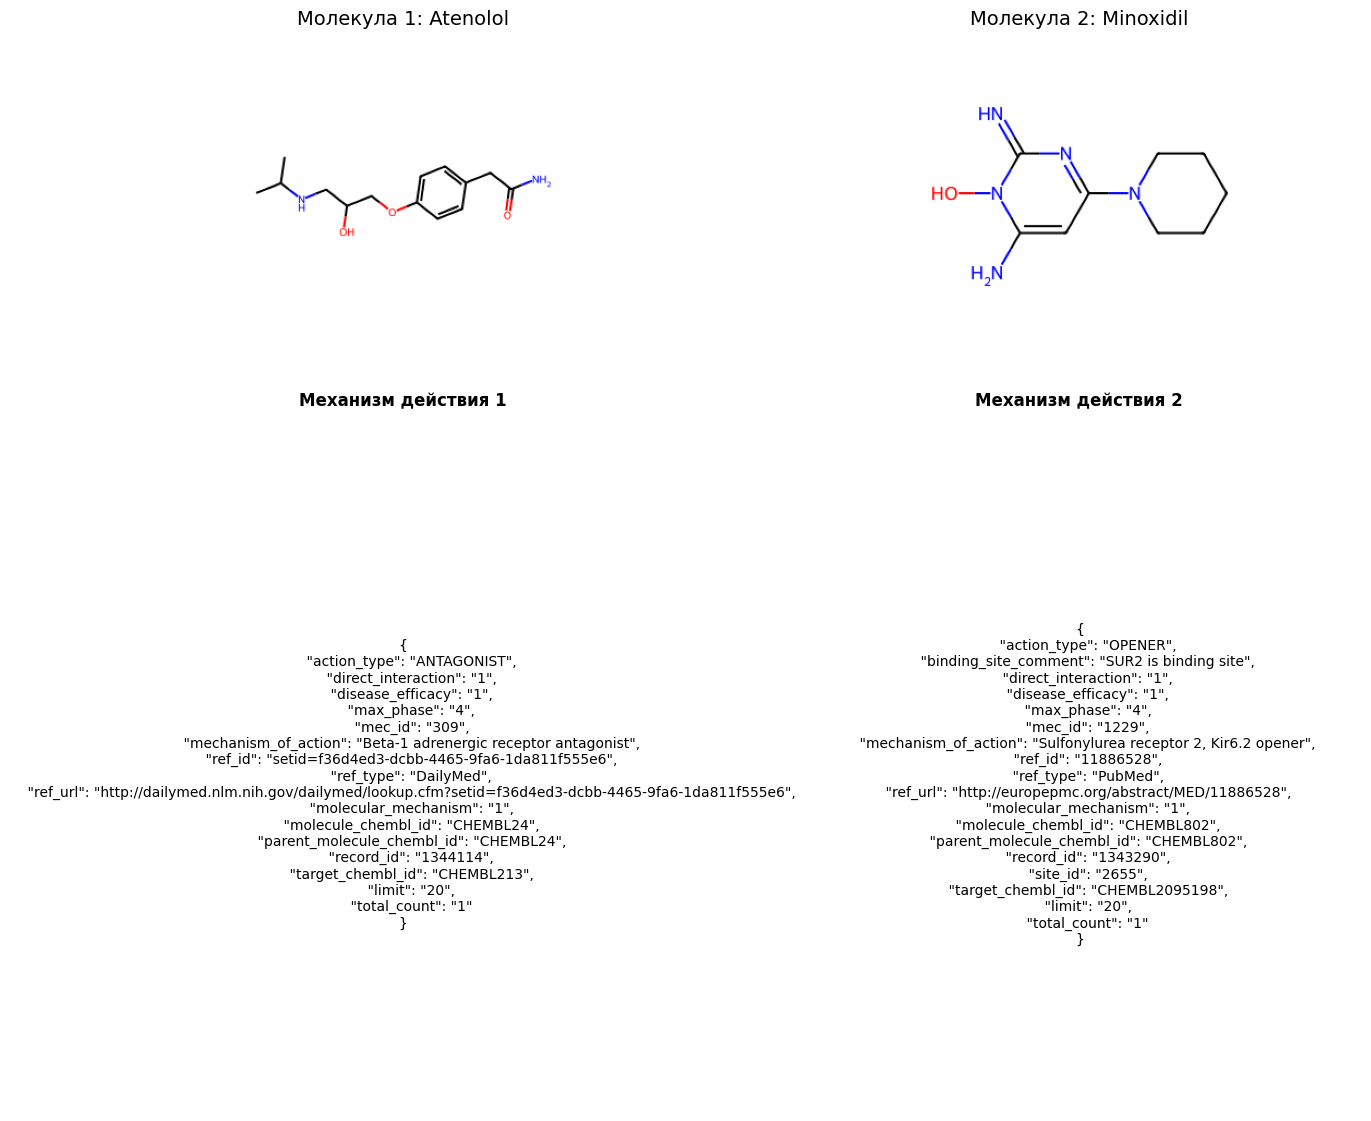

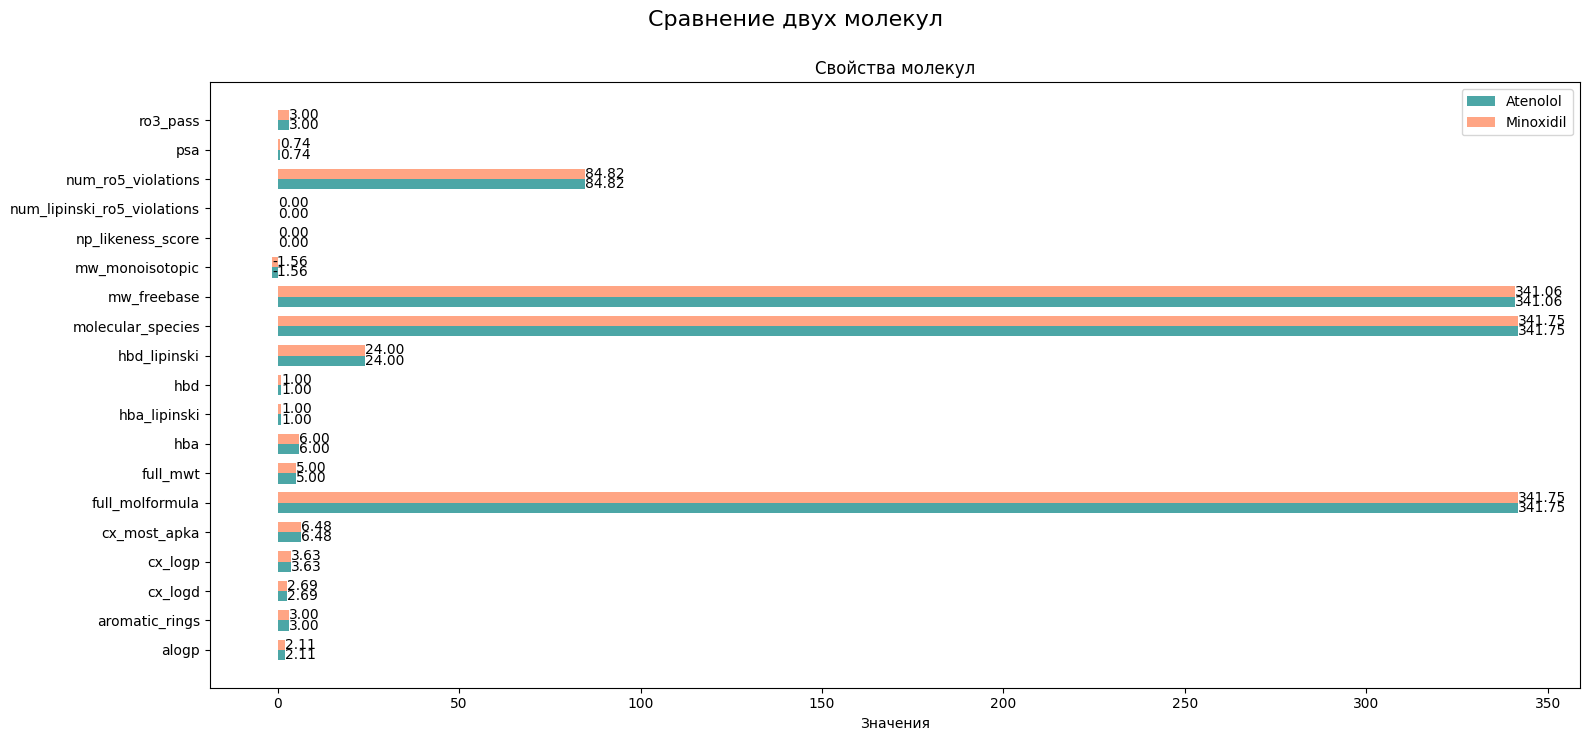

In [13]:

# Пример вызова функции
properties_json_path1 = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/molecule_properties.json'
properties_json_path2 = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/molecule_properties.json'
image_path1 = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/molecule.png'
image_path2 = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/molecule.png'
info_file_path1 = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/info.txt'
info_file_path2 = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/info.txt'
mechanism_json_path1 = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/mechanism.json'
mechanism_json_path2 = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/mechanism.json'

visualize_two_drugs(properties_json_path1, properties_json_path2, image_path1, image_path2, info_file_path1, info_file_path2, mechanism_json_path1, mechanism_json_path2)


In [ ]:
%pip install plotly
%pip install nbformat
%pip install networkx

In [ ]:
%pip install nbformat --upgrade

In [14]:
# Дополнительная визуализация
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import plotly.express as px

def visualize_data_interactive(properties_json_path, image_path, info_file_path, mechanism_file_path):
    # Загрузка и обработка информации о молекуле
    with open(properties_json_path, 'r', encoding='utf-8') as file:
        properties = json.load(file).get('molecule_properties', {})

    with open(info_file_path, 'r', encoding='utf-8') as file:
        info_lines = file.read().split('\n')

    latin_name = next((line for line in info_lines if line.startswith('Латинское название:')), '').split(': ')[1]
    molecular_formula = next((line for line in info_lines if line.startswith('Брутто формула:')), '').split(': ')[1]
    inchi_key = next((line for line in info_lines if line.startswith('Химическое название (InChIKey):')), '').split(': ')[1]

    # Загрузка текста механизма действия
    with open(mechanism_file_path, 'r', encoding='utf-8') as file:
        mechanism_data = file.read()

    # Преобразование свойств молекулы в DataFrame
    properties_df = pd.DataFrame(list(properties.items()), columns=['Property', 'Value'])
    properties_df['Value'] = pd.to_numeric(properties_df['Value'], errors='coerce')

    # Создание интерактивного графика
    fig = px.bar(properties_df, x='Value', y='Property', orientation='h', title=f'{latin_name} ({inchi_key})\nБрутто формула: {molecular_formula}')
    fig.update_layout(xaxis_title='Значения', yaxis_title='Свойства молекулы')

    # Отображение графика
    fig.show()

    # Отображение изображения молекулы
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Молекула')
    plt.show()

    # Отображение механизма действия
    print("Механизм действия:")
    print(mechanism_data)


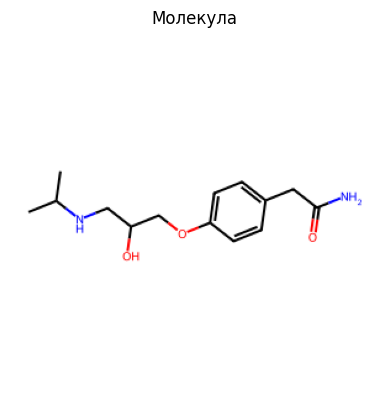

Механизм действия:
action_type: ANTAGONIST
direct_interaction: 1
disease_efficacy: 1
max_phase: 4
mec_id: 309
mechanism_of_action: Beta-1 adrenergic receptor antagonist
ref_id: setid=f36d4ed3-dcbb-4465-9fa6-1da811f555e6
ref_type: DailyMed
ref_url: http://dailymed.nlm.nih.gov/dailymed/lookup.cfm?setid=f36d4ed3-dcbb-4465-9fa6-1da811f555e6
molecular_mechanism: 1
molecule_chembl_id: CHEMBL24
parent_molecule_chembl_id: CHEMBL24
record_id: 1344114
target_chembl_id: CHEMBL213
limit: 20
total_count: 1



In [15]:

# Пример вызова функции для Atenolol
properties_json_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/molecule_properties.json'
image_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/molecule.png'
info_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/info.txt'
mechanism_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/mechanism.txt'

visualize_data_interactive(properties_json_path, image_path, info_file_path, mechanism_file_path)

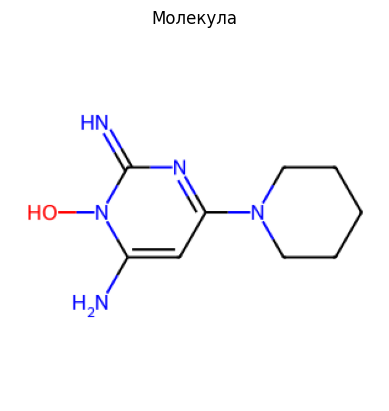

Механизм действия:
action_type: OPENER
binding_site_comment: SUR2 is binding site
direct_interaction: 1
disease_efficacy: 1
max_phase: 4
mec_id: 1229
mechanism_of_action: Sulfonylurea receptor 2, Kir6.2 opener
ref_id: 11886528
ref_type: PubMed
ref_url: http://europepmc.org/abstract/MED/11886528
molecular_mechanism: 1
molecule_chembl_id: CHEMBL802
parent_molecule_chembl_id: CHEMBL802
record_id: 1343290
site_id: 2655
target_chembl_id: CHEMBL2095198
limit: 20
total_count: 1



In [16]:

# Пример вызова функции для Minoxidil
properties_json_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/molecule_properties.json'
image_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/molecule.png'
info_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/info.txt'
mechanism_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/mechanism.txt'

visualize_data_interactive(properties_json_path, image_path, info_file_path, mechanism_file_path)

# Вариации для перспективы
Можно дополнить анализ, например, корреляционной связью между свойствами молекул и механизмом действия (Санкей-диаграммы
для создания которых можно использовать библиотеку plotly.)

In [27]:
import json
import plotly.graph_objects as go

def visualize_sankey(properties_json_path, mechanism_file_path, drug_name):
    """
    Создает диаграмму Sankey для отображения свойств молекулы и механизмов действия.
    :param properties_json_path: Путь к JSON-файлу с свойствами молекулы
    :param mechanism_file_path: Путь к текстовому файлу с механизмом действия
    :param drug_name: Название вещества для отображения в заголовке диаграммы
    """
    # Загрузка свойств молекулы
    with open(properties_json_path, 'r', encoding='utf-8') as file:
        properties = json.load(file).get('molecule_properties', {})

    # Преобразование свойств молекулы в списки, фильтрация числовых значений
    properties_keys = []
    properties_values = []
    for key, value in properties.items():
        if value is not None:  # Проверка на None
            try:
                # Пробуем преобразовать значение в float
                properties_values.append(float(value))
                properties_keys.append(key)
            except ValueError:
                # Пропускаем значения, которые не являются числами
                print(f"Пропущено свойство {key} с нечисловым значением: {value}")
        else:
            print(f"Пропущено свойство {key} с значением None")

    # Пример данных для диаграммы Sankey
    labels = properties_keys + ['Механизм действия']
    sources = list(range(len(properties_keys)))  # Источники - это индексы свойств
    targets = [len(properties_keys)] * len(properties_keys)  # Все стрелки ведут к "Механизм действия"
    values = properties_values

    # Создание диаграммы Sankey
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            color=["blue"] * len(properties_keys) + ["green"]
        ),
        link=dict(
            source=sources,
            target=targets,
            value=values
        )
    ))

    # Обновление заголовка диаграммы с динамическим названием вещества
    fig.update_layout(title_text=f"Диаграмма Sankey для {drug_name}", font_size=10)
    fig.show()


In [28]:

# Путь к файлам
properties_json_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/molecule_properties.json'
mechanism_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/mechanism.txt'
drug_name = 'Atenolol'  # Название вещества

visualize_sankey(properties_json_path, mechanism_file_path, drug_name)


Пропущено свойство cx_most_bpka с значением None
Пропущено свойство full_molformula с нечисловым значением: C17H12ClN3O3
Пропущено свойство molecular_species с нечисловым значением: ACID
Пропущено свойство ro3_pass с нечисловым значением: N


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json

def create_heatmap_from_json(json_path):
    """
    Создает тепловую карту на основе данных из JSON-файла.
    :param json_path: Путь к JSON-файлу с свойствами молекулы
    """
    # Загрузка данных из JSON
    with open(json_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        
    # Проверка структуры данных
    if 'molecule_properties' not in data:
        raise ValueError("В JSON-файле нет ключа 'molecule_properties'")
    
    properties = data['molecule_properties']
    
    # Преобразование в DataFrame
    df = pd.DataFrame(list(properties.items()), columns=['Property', 'Value'])
    
    # Если значений много и они нечисловые, можно сделать heatmap на основе подсчета
    if df['Value'].dtype == 'object':
        # Преобразование строк в категориальные значения
        df['Value'] = pd.Categorical(df['Value']).codes
    else:
        df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    
    # Преобразование данных в формат для тепловой карты
    df_pivot = df.pivot_table(index='Property', values='Value', aggfunc='mean')

    # Создание тепловой карты
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(df_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
    ax.set_title("Тепловая карта свойств молекулы")
    plt.show()

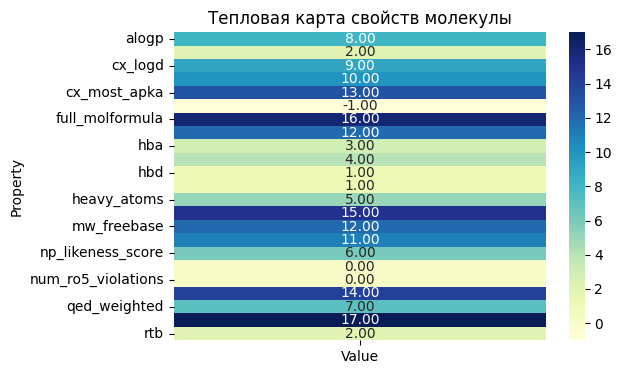

In [32]:

# Путь к JSON-файлу
json_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Minoxidil/molecule_properties.json'

create_heatmap_from_json(json_path)


Функция visualize_graph
Загрузка данных из двух и более файлов:(в перспективе интереснее отслеживать корреляцию концентрации вещества к его эффективности или токсичности, взаимосвязь структкуры с механизмом действия и т.д.)
Создание графа с узлами и ребрами, где узлы представляют собой молекулу и механизмы действия.
Ребра соединяют молекулу с её свойствами и механизмы с описаниями.
Визуализация:
Используется nx.spring_layout для размещения узлов.
Узлы и ребра визуализируются с помощью nx.draw и nx.draw_networkx_edge_labels.

Этот код создает граф, который показывает свойства молекулы и механизмы действия, визуализируя их связи и значения, что в данном случае не очень наглядно и не очень информативно, но это зависит от типа данных, которые могут быть спарсены в дальнейшем с целью развития проекта.

In [71]:
import json
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(properties_json_path, mechanism_file_path):
    """
    Создает граф, отображая свойства и механизмы действия молекул.
    :param properties_json_path: Путь к JSON-файлу с свойствами молекул
    :param mechanism_file_path: Путь к текстовому файлу с механизмом действия молекул
    """
    # Загрузка данных для молекул
    with open(properties_json_path, 'r', encoding='utf-8') as file:
        properties = json.load(file).get('molecule_properties', {})
        
    with open(mechanism_file_path, 'r', encoding='utf-8') as file:
        mechanism_info = file.read().splitlines()

    # Создание графа
    G = nx.Graph()
    
    # Добавляем узлы и ребра для свойств молекул
    for key, value in properties.items():
        if value is not None:
            try:
                value = float(value)
                G.add_edge('Молекула', key, weight=value)
            except (ValueError, TypeError):
                continue
    
    # Добавляем узлы и ребра для механизма действия
    for line in mechanism_info:
        parts = line.split(':')
        if len(parts) == 2:
            key = parts[0].strip()
            value = parts[1].strip()
            if key and value:
                G.add_edge('Механизм', key, weight=1)  # Присваиваем фиксированный вес для механизмов

    # Визуализация графа
    pos = nx.spring_layout(G, seed=22)  # Устанавливаем seed для воспроизводимости
    edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
    node_labels = {node: node for node in G.nodes}

    plt.figure(figsize=(8, 4))
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=7000, node_color='skyblue', font_size=7, font_weight='semibold', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Граф свойств молекул и механизмов действия", fontsize=12)
    plt.show()


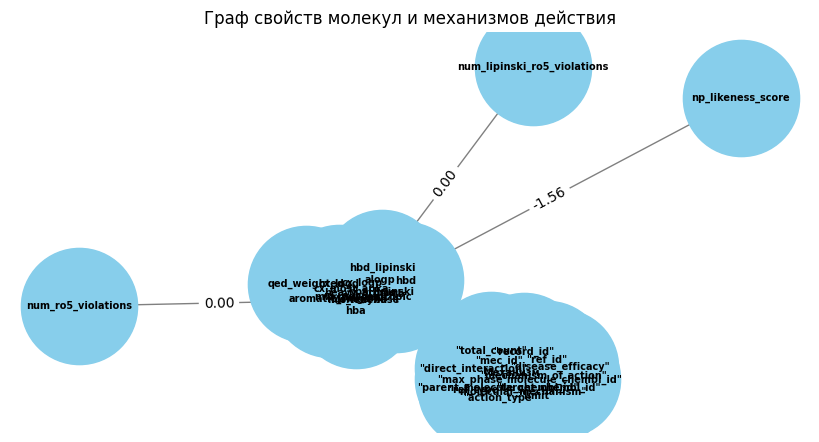

In [73]:

# Путь к файлам
properties_json_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/molecule_properties.json'
mechanism_file_path = 'C:/Users/annav/OneDrive/Desktop/test_in_silico_pharmacology/drug_data/Atenolol/mechanism.json'

visualize_graph(properties_json_path, mechanism_file_path)
